1.1 Load the data (1 points). This is data for and experiment regarding the National Supported Work Demonstration (NSW) job-training program.

In [1]:
import pandas as pd
import os
from matplotlib import pyplot as plt
import numpy as np 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from itertools import combinations 

C:\Users\LinkL\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
os.chdir('C:/Users/LinkL/OneDrive/Escritorio/DirectorioJupyter')

In [3]:
df = pd.read_csv('experimental_control.csv')
df.head()

,treat,age,educ,black,hisp,marr,nodegree,re74,re75,re78
0,1,37,11,1,0,1,1,0.0,0.0,9930.045898
1,1,22,9,0,1,0,1,0.0,0.0,3595.894043
2,1,30,12,1,0,0,0,0.0,0.0,24909.449219
3,1,27,11,1,0,0,1,0.0,0.0,7506.145996
4,1,33,8,1,0,0,1,0.0,0.0,289.789886


1.2. Find the ATE (1.5 points). With as the outcome variable of interest, find the Average Treatment Effect of participation in the program. Specifically, you should find it by calculating the difference between the means of the treatment group and the control group (the Simple Difference of Means or SDM). What can you say about the program?

In [7]:
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from itertools import combinations 
import plotnine as p


mean1 = df[df.treat==1].re78.mean()
mean0 = df[df.treat==0].re78.mean()
ate = np.unique(mean1 - mean0)[0]
print("The experimental ATE estimate is {:.2f}".format(ate))

The experimental ATE estimate is 1794.34


Answer: I can say that people who participated in the program are $1,794.34 higher than the ones who didn't participate. It means the effect is positive.

In [9]:
pip install plotnine

Note: you may need to restart the kernel to use updated packages.


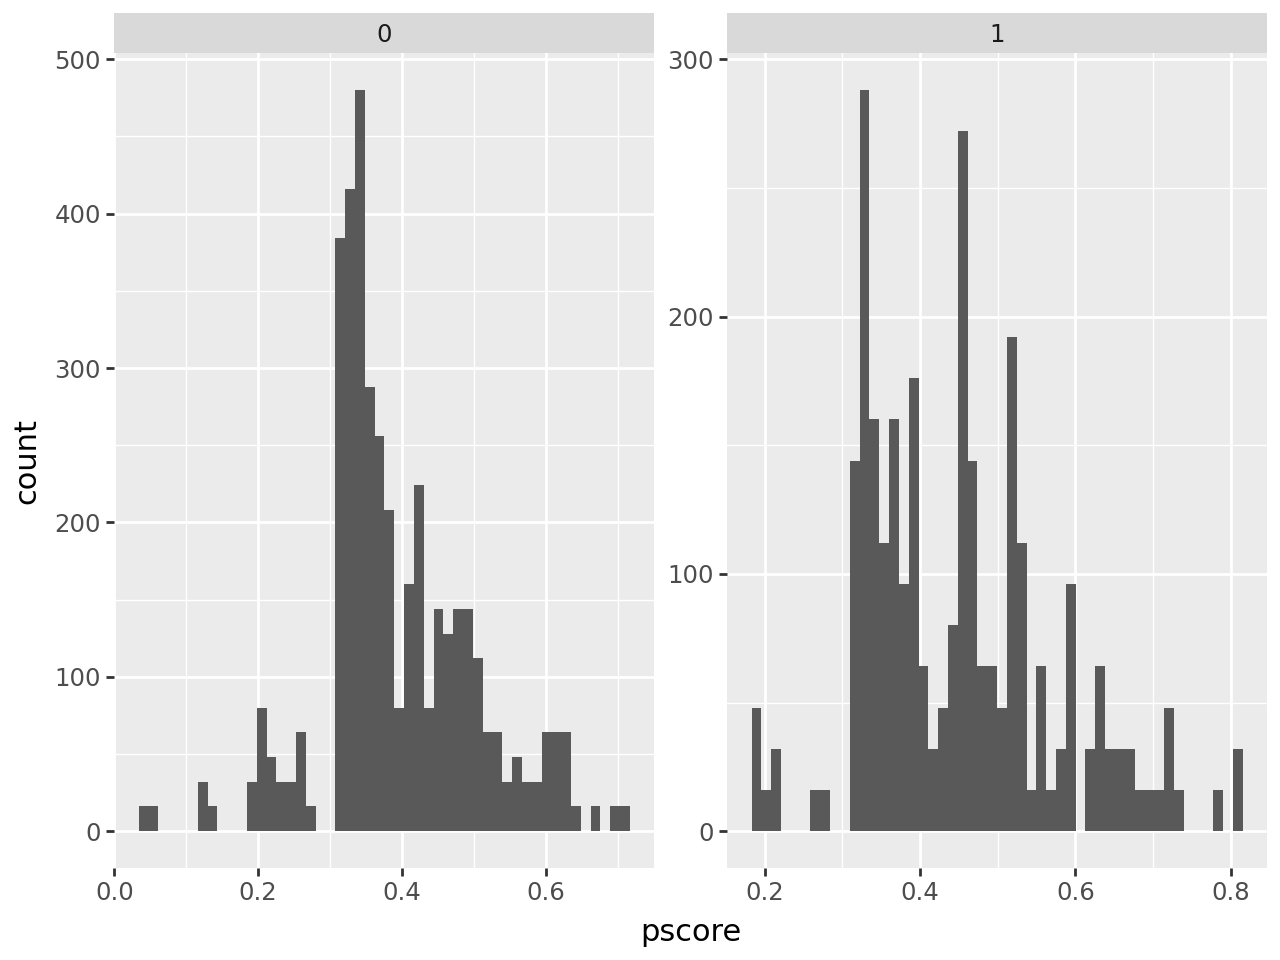

In [29]:
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from itertools import combinations 
import plotnine as p

df['u74'], df['u75'] = 0, 0
df.loc[df.re74==0, 'u74'] = 1
df.loc[df.re75==0, 'u75'] = 1
# Propensity Score estimación
logit_nsw = smf.glm(formula="""treat ~ age + I(age**2) + I(age**3) + educ + I(educ**2) + 
                    marr + nodegree + black + hisp + re74 + re75 + u74 + u75 + educ*re74""", 
                    family=sm.families.Binomial(),
                   data=df).fit()
                  
df['pscore'] = logit_nsw.predict(df)

df.groupby('treat')['pscore'].mean()

p.ggplot(df, p.aes(x='pscore')) +    p.geom_histogram(bins=50) +    p.facet_wrap("treat", scales='free')

In [27]:
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from itertools import combinations 
import plotnine as p


df[['u74', 'u75']] = 0
df.loc[df.re74==0, 'u74'] = 1
df.loc[df.re75==0, 'u75'] = 1

logit_nsw = smf.glm(formula="""treat ~ age + age**2 + age**3 + educ + educ**2 + 
                    marr + nodegree + black + hisp + re74 + re75 + u74 + u75 + educ*re74""", 
                    family=sm.families.Binomial(),
                   data=df).fit()
                  
df['pscore'] = logit_nsw.predict(df)


N = df.shape[0]

df['d1'] = df.treat/df.pscore
df['d0'] = (1-df.treat)/(1-df.pscore)


s1 = df.d1.sum()
s0 = df.d0.sum()

df['y1'] = df.treat * df.re78 / df.pscore
df['y0'] = (1 - df.treat) * df.re78 / (1 - df.pscore)
df['ht'] = df['y1'] - df['y0']

te_1 = df.ht.mean()

print("Treatment Effect (non-normalized, all data): {:.2f}".format(te_1))
        

df['y1'] = df.treat * df.re78 / df.pscore
df['y1'] /= s1/N
df['y0'] = (1 - df.treat) * df.re78 / (1 - df.pscore)
df['y0'] /= s0/N
df['ht'] = df['y1'] - df['y0']

te_2 = df.ht.mean()

print("Treatment Effect (normalized, all data): {:.2f}".format(te_2))
        


nsw_dw_trimmed = df.drop(['d1', 'd0', 'y1', 'y0'], axis=1)
nsw_dw_trimmed = nsw_dw_trimmed[nsw_dw_trimmed.pscore.between(.1, .9)]
N = nsw_dw_trimmed.shape[0]

nsw_dw_trimmed['y1'] = nsw_dw_trimmed.treat * nsw_dw_trimmed.re78 / nsw_dw_trimmed.pscore
nsw_dw_trimmed['y0'] = (1 - nsw_dw_trimmed.treat) * nsw_dw_trimmed.re78 / (1 - nsw_dw_trimmed.pscore)
nsw_dw_trimmed['ht'] = nsw_dw_trimmed['y1'] - nsw_dw_trimmed['y0']

te_3 = nsw_dw_trimmed.ht.mean()

print("Treatment Effect (non-normalized, trimmed data): {:.2f}".format(te_3))



nsw_dw_trimmed['y1'] = nsw_dw_trimmed.treat * nsw_dw_trimmed.re78 / nsw_dw_trimmed.pscore
nsw_dw_trimmed['y1'] /= s1/N
nsw_dw_trimmed['y0'] = (1 - nsw_dw_trimmed.treat) * nsw_dw_trimmed.re78 / (1 - nsw_dw_trimmed.pscore)
nsw_dw_trimmed['y0'] /= s0/N
nsw_dw_trimmed['ht'] = nsw_dw_trimmed['y1'] - nsw_dw_trimmed['y0']

te_4 = nsw_dw_trimmed.ht.mean()

print("Treatment Effect (normalized, trimmed data): {:.2f}".format(te_4))

Treatment Effect (non-normalized, all data): 1539.76
Treatment Effect (normalized, all data): 1564.88
Treatment Effect (non-normalized, trimmed data): 1579.72
Treatment Effect (normalized, trimmed data): 1597.71


In [17]:
!pip install econml

In [31]:
from econml.grf import CausalForest
from sklearn.model_selection import train_test_split
import pandas as pd

1.4. Heterogeneous effects with causal forests (3 points). Use causal forests like we saw in class. For Python, you should use the econml package; for R, use the grf package; and for Julia, you will need to use the auxiliary variable Y ∗ computed in the previous exercise and fit a random forest regressor. Report the importance of the prediction variables.

In [33]:
from econml.dml import CausalForestDML
import numpy as np

np.random.seed(0)
tree_model = CausalForestDML(n_estimators=100, subforest_size=5, inference=True, max_depth=3)
tree_model = tree_model.fit(Y=nsw_dw_cpscontrol['re78'], X=nsw_dw_cpscontrol[['age', 'educ', 'black', 'hisp', 're74', 're75']], T=nsw_dw_cpscontrol['treat'])



NameError: name 'nsw_dw_cpscontrol' is not defined

1.3. Heterogeneous effects with causal trees (3 points). Use causal trees like we saw in class. For Python, you should use the econml package; for R, use the grf package; and for Julia, you will need to create the auxiliary variable Y ∗ and fit a decision tree regressor. Report the splits the tree finds and interpret them.

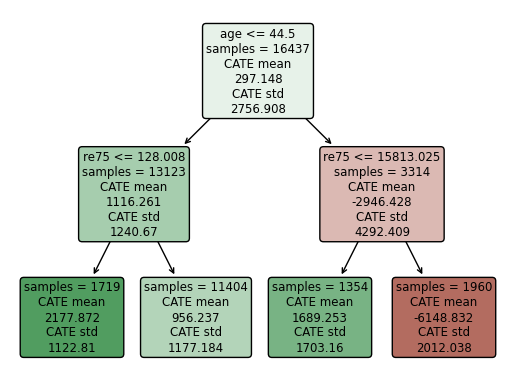

In [16]:
from econml.cate_interpreter import SingleTreeCateInterpreter
import matplotlib.pyplot as plt

intrp = SingleTreeCateInterpreter(max_depth=2).interpret(tree_model, nsw_dw_cpscontrol[['age', 'educ', 'black', 'hisp', 're74', 're75']])

intrp.plot(feature_names=['age', 'educ', 'black', 'hisp', 're74', 're75'])
plt.show()

1.5. Plot heterogeneous effects (1.5 points). Plot how the predicted treatment effect changes depending on a variable of your choice. (You can see the last example in PD11 for clarification of what you should do in this exercise)

<Figure size 1000x600 with 0 Axes>

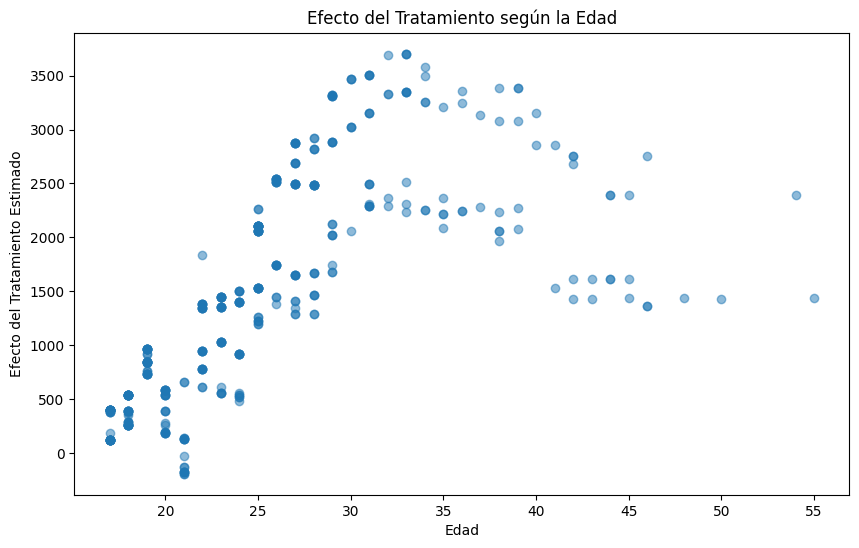

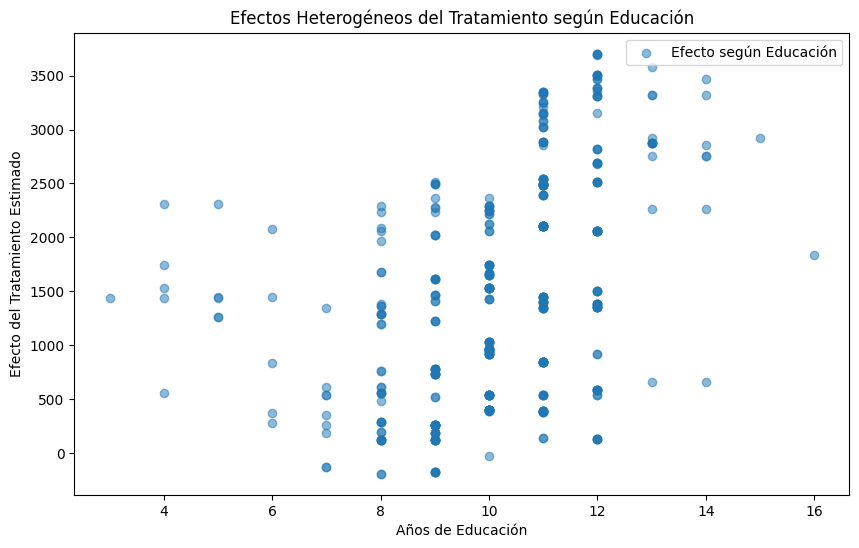

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from econml.dml import CausalForestDML

tree_model = CausalForestDML(n_estimators=100, subforest_size=10, max_depth=3)
tree_model.fit(Y=df['re78'], X=df[['age', 'educ']], T=df['treat'])

# Estimamos los efectos heterogéneos del tratamiento x observación
te_pred = tree_model.effect(df[['age', 'educ']])

# Gráfico del efecto de tratamiento sobre variable age y educ
plt.figure(figsize=(10,6))
plt.scatter(df['age'], te_pred, alpha=0.5)
plt.xlabel('Edad')
plt.ylabel('Efecto del Tratamiento Estimado')
plt.title('Efecto del Tratamiento según la Edad')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df['educ'], te_pred, alpha=0.5, label="Efecto según Educación")
plt.xlabel('Años de Educación')
plt.ylabel('Efecto del Tratamiento Estimado')
plt.title('Efectos Heterogéneos del Tratamiento según Educación')
plt.legend()
plt.show()